# CS 584 Project
## 1. Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.decomposition import PCA
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_auc_score, roc_curve, auc, pairwise_distances
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
from sklearn.base import clone
from itertools import combinations 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , StandardScaler
from sklearn import feature_selection, model_selection, preprocessing
import math

## 2. Importing and sampling data

In [3]:
df = pd.read_csv("./data/data.csv", header=0)
df = df.rename(columns={"Unnamed: 0": "Patient ID"})
df_label = pd.read_csv("./data/labels.csv", header=0)
df_label = df_label.rename(columns={"Unnamed: 0": "Patient ID"})

In [4]:
df.sample(5)

,Patient ID,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
690,sample_690,0.0,3.565975,4.160452,6.487372,10.202197,0.0,7.373640,0.000000,0.0,...,5.503361,8.283195,10.212654,4.942125,9.607944,11.825547,9.629222,9.409427,8.635620,0.0
506,sample_506,0.0,3.950254,3.847015,6.321558,9.330516,0.0,7.602795,1.111232,0.0,...,6.936025,9.979725,10.360715,2.033582,9.373211,11.509453,11.058344,11.174913,4.664870,0.0
532,sample_532,0.0,4.515403,1.487486,7.026579,10.118682,0.0,6.092436,0.559247,0.0,...,6.507194,9.391147,9.817051,7.460980,9.431276,11.214896,9.854426,9.811739,2.519743,0.0
530,sample_530,0.0,3.898615,3.323788,6.974392,9.627001,0.0,6.713366,0.594071,0.0,...,6.330564,9.169183,10.558488,0.000000,8.953364,11.601000,10.401061,9.609230,1.013641,0.0
551,sample_551,0.0,1.433227,2.441590,7.395508,9.964325,0.0,8.894878,0.639232,0.0,...,6.294573,8.806021,9.460681,8.142388,9.625550,11.751410,10.027339,9.108119,5.240211,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Patient ID to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [6]:
print("Dataset Shape : ",df.shape) 
print("Dataset Size : ",df.size) 

Dataset Shape :  (801, 20532)
Dataset Size :  16446132


## 3. Exploratory Data Analysis

In [6]:
df.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [7]:
df_label.sample(5)

,Patient ID,Class
637,sample_637,BRCA
619,sample_619,BRCA
222,sample_222,KIRC
537,sample_537,PRAD
259,sample_259,BRCA


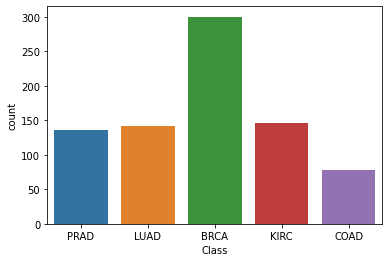

In [8]:
sns.countplot(df_label['Class'])
plt.show()

In [9]:
df_label.describe()

,Patient ID,Class
count,801,801
unique,801,5
top,sample_160,BRCA
freq,1,300


In [10]:
print('Number of patients: {}'.format(len(df)))

Number of patients: 801


In [11]:
print('Percantage of each type of cancer: \n{}'.format(df_label['Class'].value_counts(normalize = True)*100))

Percantage of each type of cancer: 
BRCA    37.453184
KIRC    18.227216
LUAD    17.602996
PRAD    16.978777
COAD     9.737828
Name: Class, dtype: float64


In [13]:
print('Number of null values:', df.isnull().sum().sum())

Number of null values: 0


In [7]:
df = df.assign(Class = pd.Series(df_label['Class'].values))

In [8]:
a = df.shape
a = a[0] * a[1]
b = (df != 0).sum(1).sum()
sparsity = 1 - (b/a)
print('Percentage of Sparsity of our Dataset: %.2f' % (sparsity*100))

Percentage of Sparsity of our Dataset: 14.22


In [9]:
labelenc = preprocessing.LabelEncoder()
labelenc.fit(df['Class'].unique())
labelenc.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [10]:
labelenc.inverse_transform([0, 1, 2, 3, 4])
df['Class'] = labelenc.transform(df['Class'])
s = df['Class'].unique()
s.sort()
print(s)

[0 1 2 3 4]


In [11]:
X = np.array(df.iloc[:, 1:-1].values)
y = np.array(df.iloc[:, -1].values) 

## 4. Holding out 30% of the data as the test set

In [12]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((560, 20531), (560,), (241, 20531), (241,))

## 5. Feature Engineering
### 5.1 Feature Scaling

In [13]:
stdsc = StandardScaler()

X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

### 5.2 Feature Importances

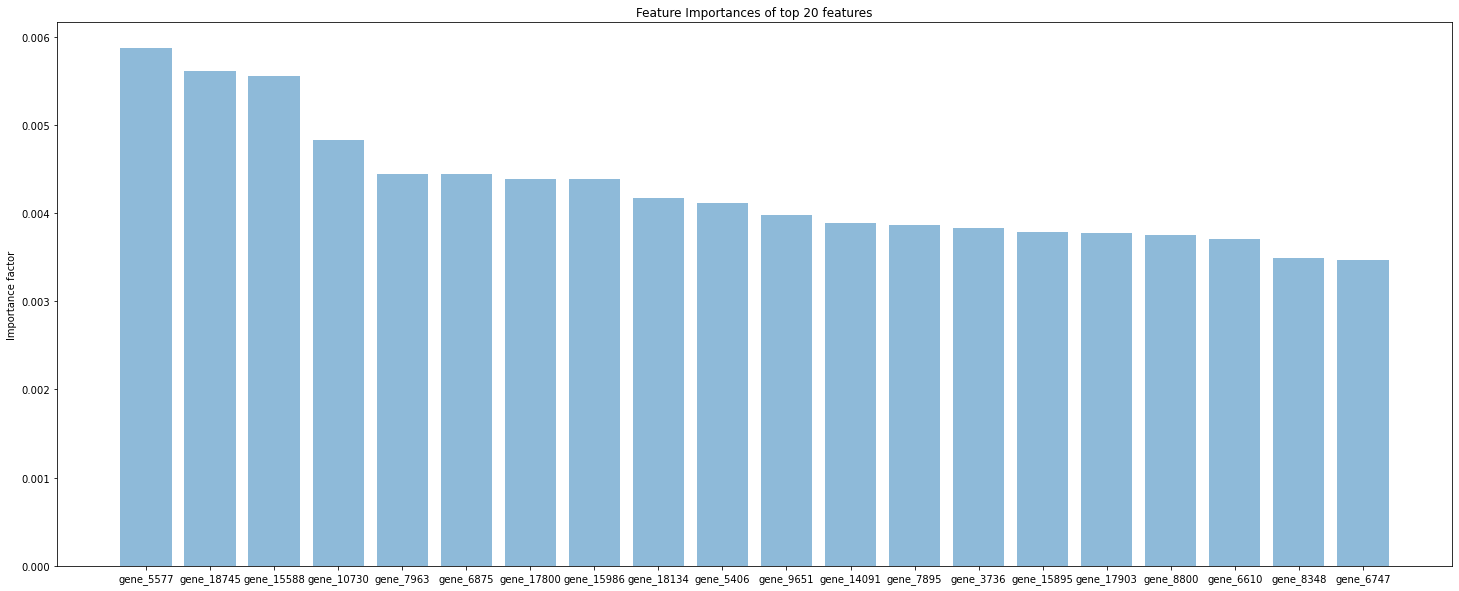

In [14]:
rnd_clf = RandomForestClassifier(n_estimators=1500, n_jobs=3)
rnd_clf.fit(X_train, y_train)
list_features = sorted(zip(rnd_clf.feature_importances_, df.columns), reverse=True, key = lambda x: x[0])
top_features = {}
for row in list_features[:20]:
    top_features[row[1]] = row[0]
plt.figure(figsize=(25, 10))
plt.bar(top_features.keys(), top_features.values(), align='center', alpha=0.5)
plt.ylabel('Importance factor')
plt.title('Feature Importances of top 20 features')
plt.show()

### 5.4 Dimensionality Reduction with PCA and t-SNE

In [15]:
max1 = 0
max_score_pc = 0
    
for i in range(2, 6):
    pipe = Pipeline([('pca', PCA(n_components=i, random_state=0)),
    ('clf', DecisionTreeClassifier())])
    pipe.fit(X_train, y_train)
    if(max1 < pipe.score(X_test, y_test)):
        max1 = pipe.score(X_test, y_test)
        max_score_pc = i

pca = PCA(n_components=max_score_pc)
principal_component = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data=principal_component)
y_train_pca = pd.DataFrame(data = labelenc.inverse_transform(y_train), columns = ["Class"])
pca_df = pd.concat([principal_df, y_train_pca], axis=1)

In [16]:
pca_df.head()

,0,1,2,3,Class
0,-17.298308,-67.434826,-15.222960,5.018717,BRCA
1,-21.184985,-48.847991,22.679336,-2.494047,BRCA
2,-2.856142,-19.207746,55.587486,24.812400,PRAD
3,-40.803192,-40.539202,-26.429228,-10.555199,BRCA
4,-11.057068,29.315560,50.193902,-6.023520,PRAD


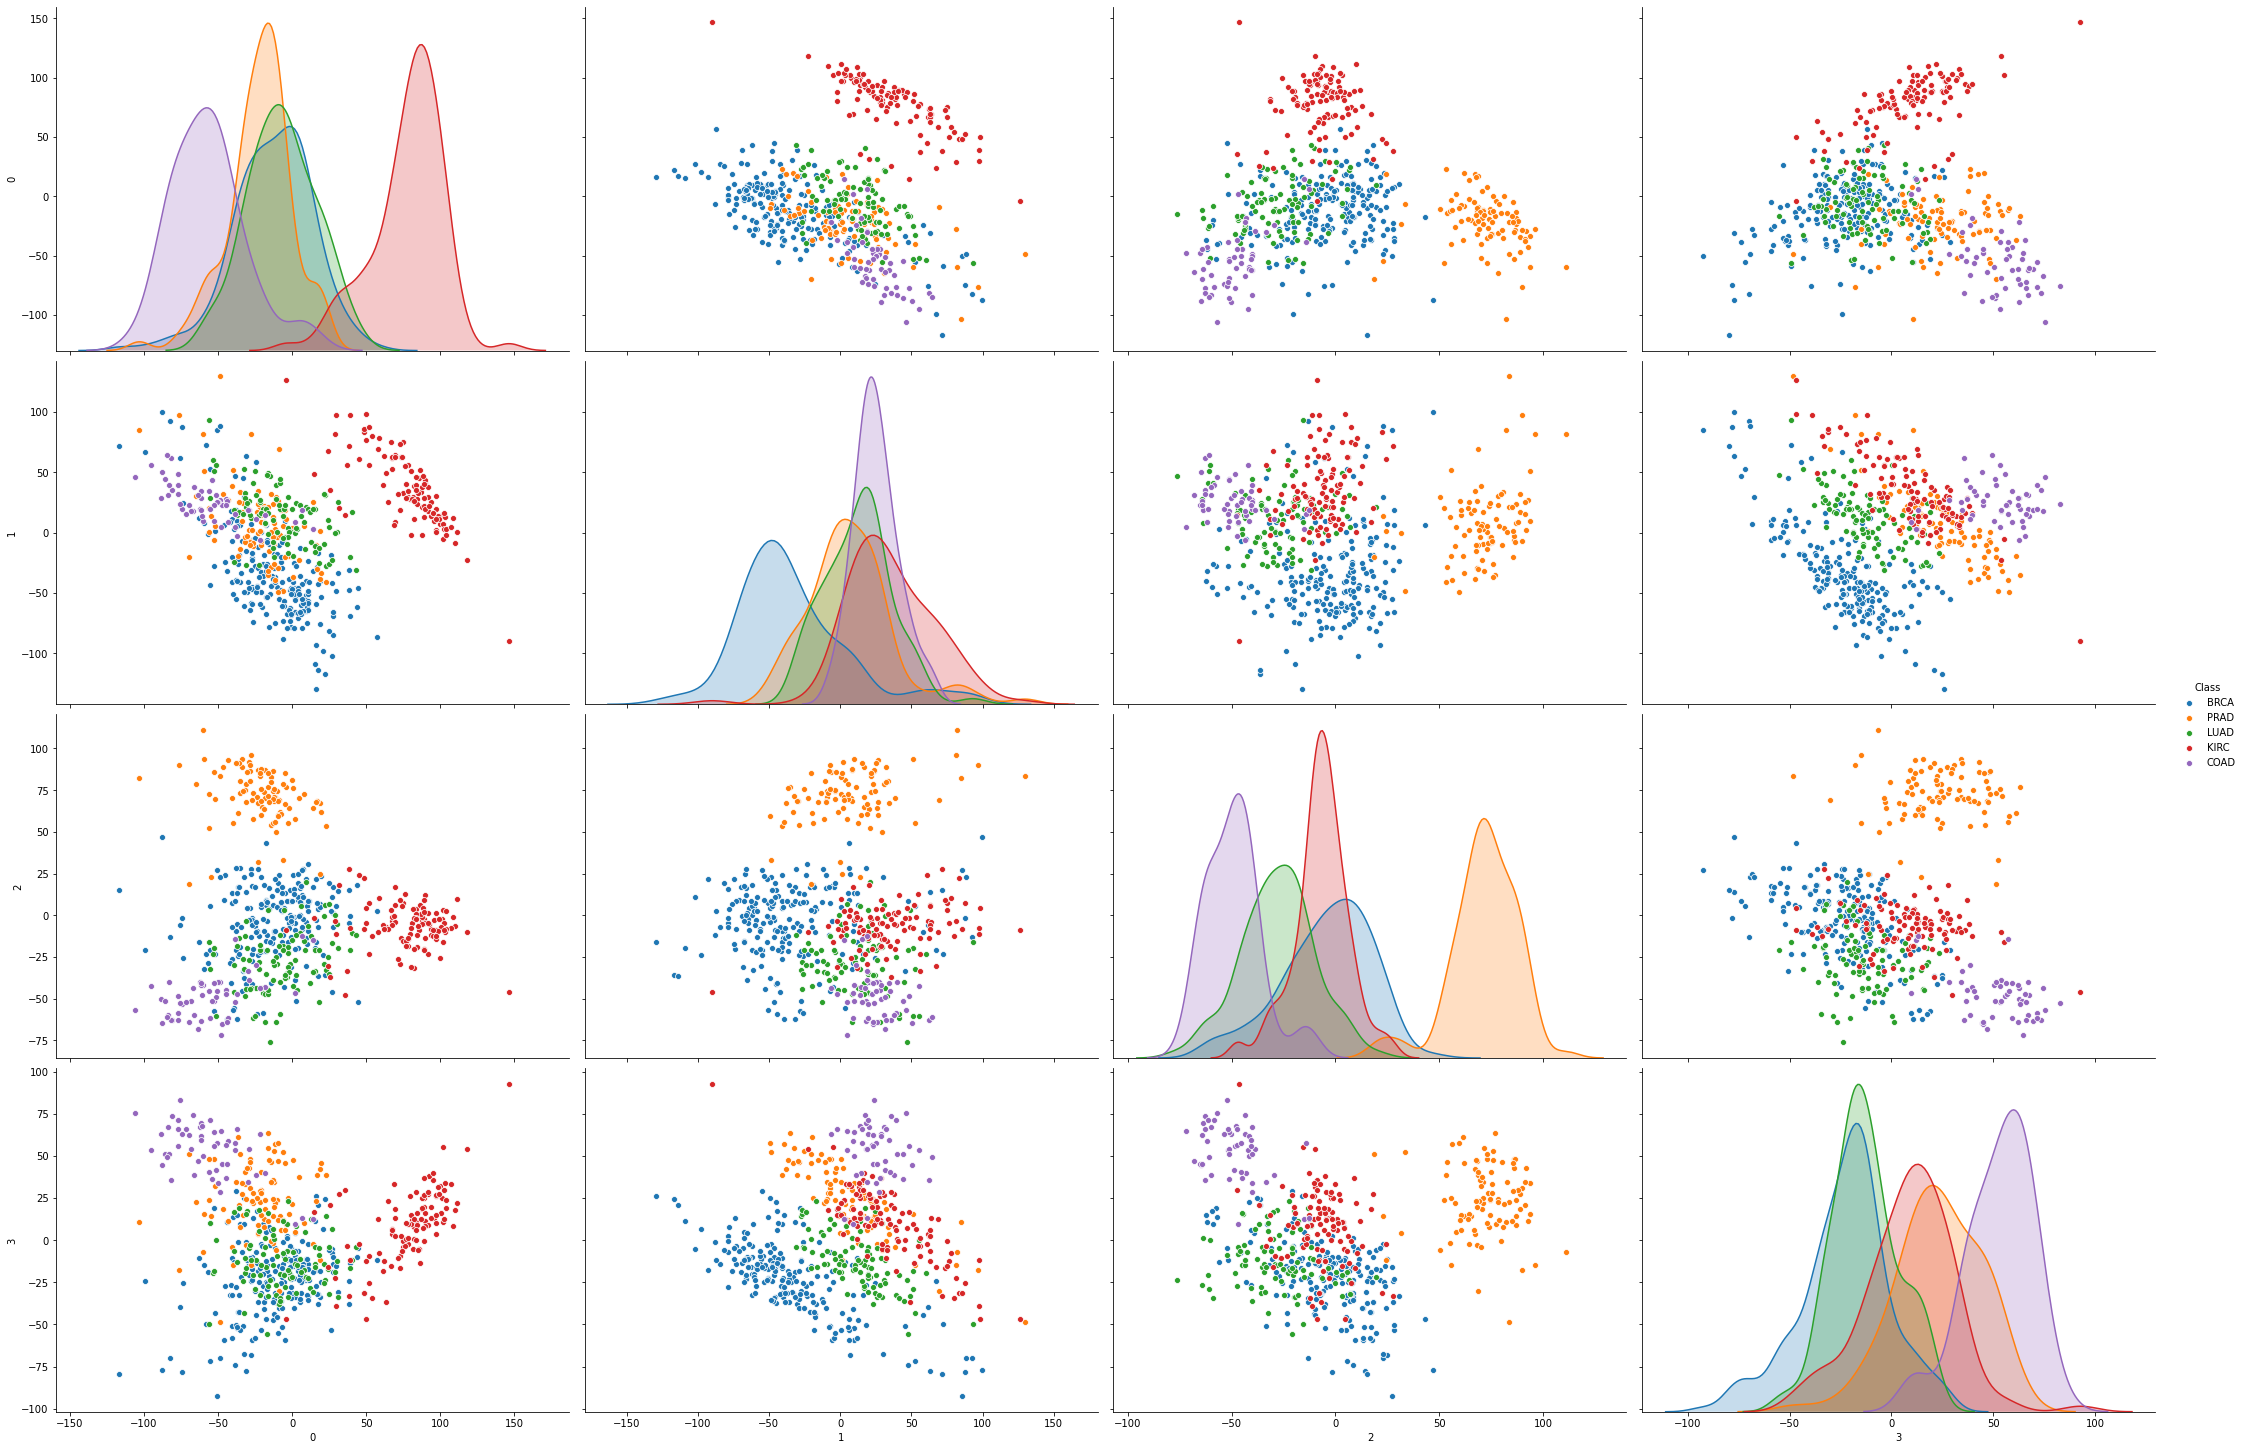

In [23]:
sns.pairplot(x_vars = [0, 1, 2, 3], y_vars = [0, 1, 2, 3],data=pca_df, hue="Class",height=5,aspect=1.5)

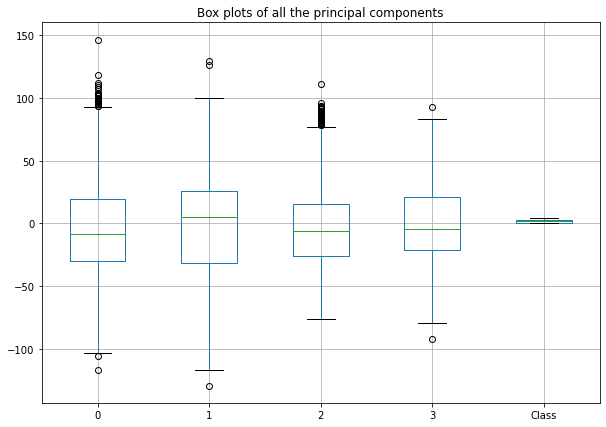

In [56]:
pca_df.boxplot(figsize= (10,7))
plt.title("Box plots of all the principal components")
plt.show()

In [60]:
tsne = TSNE(n_components=2
            , random_state=0)
principal_component1 = tsne.fit_transform(X_train)
principal_df = pd.DataFrame(data=principal_component1)
y_train_tsne = pd.DataFrame(data = labelenc.inverse_transform(y_train), columns = ["Class"])
tsne_df = pd.concat([principal_df, y_train_tsne], axis=1)
tsne_df.head()

,0,1,Class
0,-12.967100,-13.245197,0
1,-4.960785,-19.880939,0
2,20.928839,-7.980594,4
3,-6.483153,-23.681604,0
4,17.261839,-8.554152,4


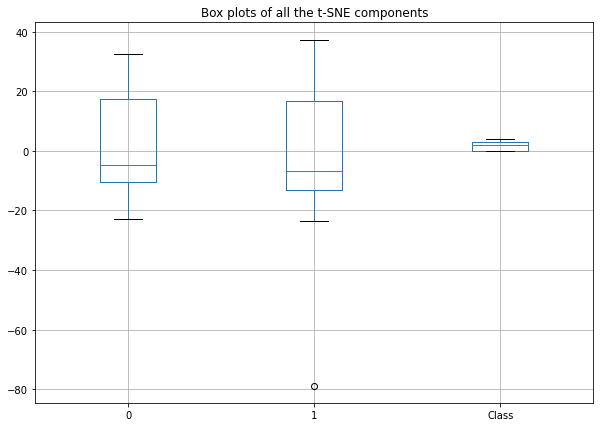

In [58]:
tsne_df.boxplot(figsize= (10,7))
plt.title("Box plots of all the t-SNE components")
plt.show()

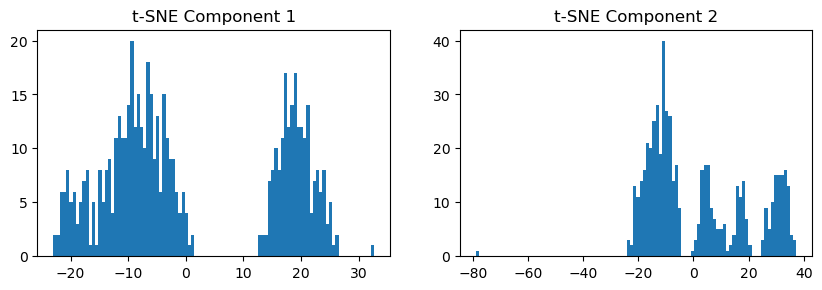

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), dpi=100)
ax1.hist(tsne_df.iloc[:, 0].values, bins=100)
ax1.set_title("t-SNE Component 1")

ax2.hist(tsne_df.iloc[:, 1].values, bins=100)
ax2.set_title("t-SNE Component 2")
plt.show()

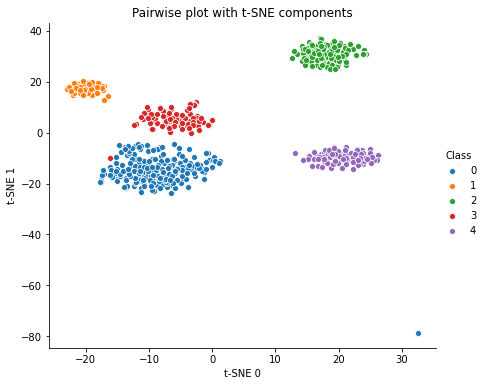

In [63]:
sns.pairplot(x_vars=0, y_vars=1, data=tsne_df, hue="Class",height=5,aspect=1.2)
plt.title("Pairwise plot with t-SNE components")
plt.xlabel("t-SNE 0")
plt.ylabel("t-SNE 1")
plt.show()

## 6. Model Selection

In [67]:
def boxplot_cv_results(models_res):
    for model_name in models_res.keys():
        model_scores = pd.DataFrame.from_dict(models_res[model_name])
        model_scores[['test_score', 'train_score']].boxplot()
        plt.title(model_name)
        plt.show()

In [68]:
ml_alg = [ ensemble.RandomForestClassifier(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),    
    DecisionTreeClassifier(),
    svm.LinearSVC()
    ]

ml_alg_predict = df.Class

### 6.1 Training with PCA-reduced data

In [58]:
ml_alg_columns = ['Model Name','Train Accuracy Mean', 'Validation Accuracy Mean','Time']
ml_alg_compare_pca = pd.DataFrame(columns = ml_alg_columns)
row_index = 0
models_res={}
for alg in ml_alg:
    ml_alg_name = alg.__class__.__name__
    
    ml_alg_compare_pca.loc[row_index, 'Model Name'] = ml_alg_name
    pipe = Pipeline([('pca', PCA(n_components=max_score_pc)),
                         ('clf', alg)])
    
    cv_results = model_selection.cross_validate(pipe, X_train, y_train, cv=5, n_jobs=-1, verbose=False, return_train_score=True)
    models_res[ml_alg_name] = cv_results
    ml_alg_compare_pca.loc[row_index, 'Time'] = cv_results['fit_time'].mean()
    ml_alg_compare_pca.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    ml_alg_compare_pca.loc[row_index, 'Validation Accuracy Mean'] = cv_results['test_score'].mean()   
    pipe.fit(X_train, y_train)
    ml_alg_predict[ml_alg_name] = pipe.predict(X_test)
    y_true, y_pred = y_test, ml_alg_predict[ml_alg_name]
    ml_alg_compare_pca.loc[row_index, 'Test F1 Score'] = classification_report(y_true,y_pred, output_dict=True)['weighted avg']['f1-score']
    row_index+=1
ml_alg_compare_pca.sort_values(by = ['Test F1 Score'], ascending = False, inplace = True)
ml_alg_compare_pca

/Users/shashank/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Model Name,Train Accuracy Mean,Validation Accuracy Mean,Time,Test F1 Score
0,RandomForestClassifier,0.999524,0.98,1.70037,0.945995
2,GaussianNB,0.964286,0.96381,1.79949,0.934815
3,DecisionTreeClassifier,1,0.966667,1.49027,0.929802
1,BernoulliNB,0.897857,0.892381,1.4039,0.839721
4,LinearSVC,0.932143,0.946667,1.62981,0.833856


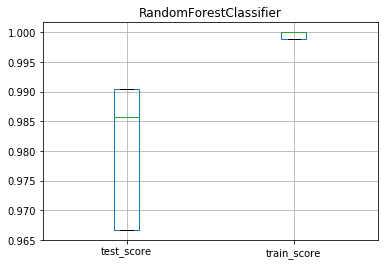

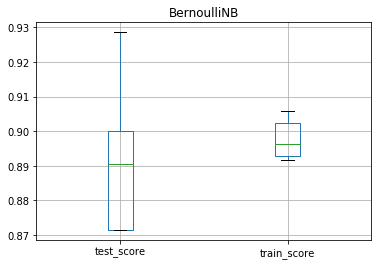

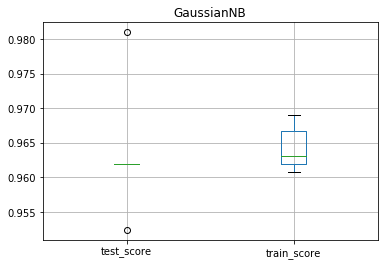

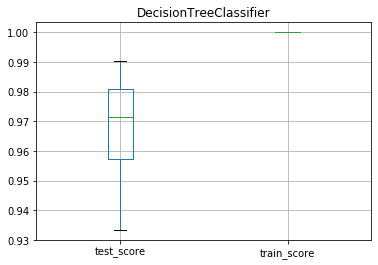

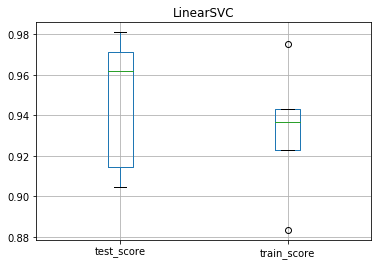

In [59]:
boxplot_cv_results(models_res)

### 6.2 Training with t-SNE reduced data

In [60]:
size_train = X_train.shape[0]
X = np.vstack((X_train,X_test))
X_tsne = TSNE(n_components=2, random_state=0).fit_transform( X ) 
X_train_tsne = X_tsne[0:size_train,:]
X_test_tsne  = X_tsne[size_train:,:]

In [61]:
ml_alg_columns = ['Model Name','Train Accuracy Mean', 'Validation Accuracy Mean','Time']
ml_alg_compare_tsne = pd.DataFrame(columns = ml_alg_columns)
models_res = {}
row_index = 0
for alg in ml_alg:
    ml_alg_name = alg.__class__.__name__
    
    ml_alg_compare_tsne.loc[row_index, 'Model Name'] = ml_alg_name
    cv_results = model_selection.cross_validate(alg, X_train_tsne, y_train, cv=5, n_jobs=-1, verbose=False, return_train_score=True)
    models_res[ml_alg_name] = cv_results
    ml_alg_compare_tsne.loc[row_index, 'Time'] = cv_results['fit_time'].mean()
    ml_alg_compare_tsne.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    ml_alg_compare_tsne.loc[row_index, 'Validation Accuracy Mean'] = cv_results['test_score'].mean()   
    alg.fit(X_train_tsne, y_train)
    ml_alg_predict[ml_alg_name] = alg.predict(X_test_tsne)
    y_true, y_pred = y_test, ml_alg_predict[ml_alg_name]
    ml_alg_compare_tsne.loc[row_index, 'Test F1 Score'] = classification_report(y_true,y_pred, output_dict=True)['weighted avg']['f1-score']
    row_index+=1

ml_alg_compare_tsne.sort_values(by = ['Test F1 Score'], ascending = False, inplace = True)
ml_alg_compare_tsne


/Users/shashank/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shashank/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Model Name,Train Accuracy Mean,Validation Accuracy Mean,Time,Test F1 Score
0,RandomForestClassifier,0.999524,0.993333,0.00804386,0.995840
4,LinearSVC,0.991905,0.987619,0.0421359,0.995840
3,DecisionTreeClassifier,1,0.994286,0.000870514,0.991657
2,GaussianNB,0.987143,0.986667,0.000775576,0.979398
1,BernoulliNB,0.759048,0.759048,0.000803471,0.655380


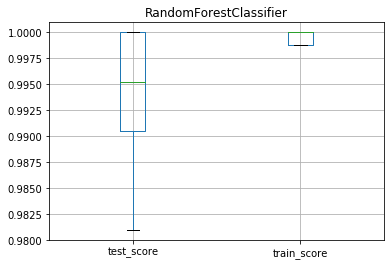

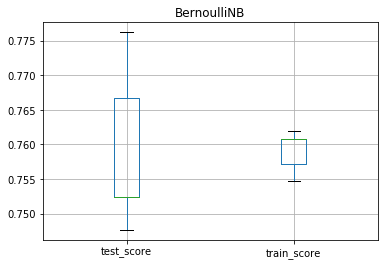

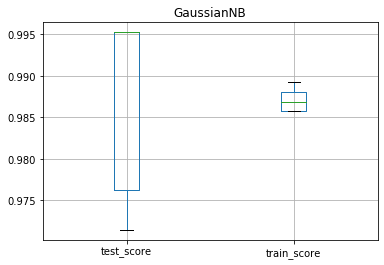

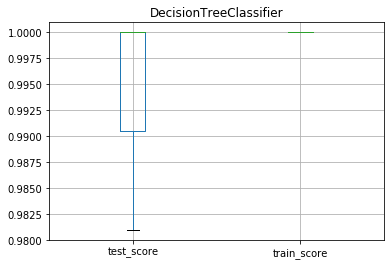

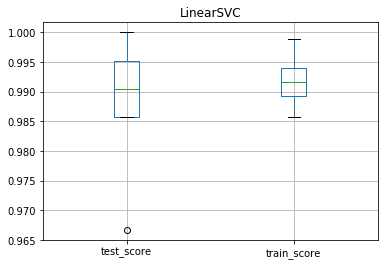

In [62]:
boxplot_cv_results(models_res)

## 7. Hyperparameter Tuning
### 7.1 Tuning with t-SNE data on Random Forest, SVM, Decision Tree
#### 7.1.1 Random Forest

In [60]:
parameters = {'criterion':('entropy', 'gini'), 'n_estimators':[x for x in range(10,100,20)], 
              'max_features':('auto','sqrt','log2'),
              'max_depth' : [int(x) for x in np.linspace(5, 20, num = 7)]}
rf = ensemble.RandomForestClassifier(bootstrap=True, random_state=0, n_jobs=-1)
clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
clf.fit(X_train_tsne, y_train)
print("Best hyperparameters", clf.best_params_)

Best hyperparameters {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 30}


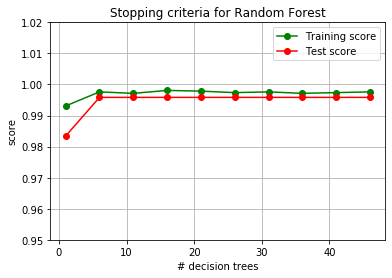

In [58]:
train_errors=[]
test_errors=[]
num_trees=range(1,50, 5)

for trees in num_trees:
    alg = ensemble.RandomForestClassifier(bootstrap=True, random_state=0, criterion='entropy', n_estimators=trees, n_jobs=-1, max_depth=5)
    cv_results = model_selection.cross_validate(alg, X_train_tsne, y_train, cv=5, verbose=False, return_train_score=True)
    alg.fit(X_train_tsne, y_train)
    train_errors.append(cv_results['train_score'].mean())
    test_errors.append(alg.score(X_test_tsne, y_test))
    
plt.plot(num_trees, train_errors, 'o-', color="g", label="Training score")
plt.plot(num_trees, test_errors, 'o-', color="r", label="Test score")
plt.title("Stopping criteria for Random Forest")
plt.xlabel("# decision trees")
plt.ylabel("score")
plt.legend(loc="best")
plt.ylim(0.95, 1.02)
plt.grid()
plt.show()

In [59]:
rf = ensemble.RandomForestClassifier(bootstrap=True, random_state=0, n_jobs=-1, n_estimators=6, 
                                     criterion = 'entropy', max_features= 'auto', max_depth=5)
rf.fit(X_train_tsne, y_train)
print(classification_report(y_test,clf.predict(X_test_tsne), digits=4))
print("Training accuracy:",rf.score(X_train_tsne, y_train))
print("Test accuracy:",rf.score(X_test_tsne, y_test))

              precision    recall  f1-score   support

           0     0.9890    1.0000    0.9945        90
           1     1.0000    1.0000    1.0000        25
           2     1.0000    1.0000    1.0000        38
           3     1.0000    0.9787    0.9892        47
           4     1.0000    1.0000    1.0000        41

    accuracy                         0.9959       241
   macro avg     0.9978    0.9957    0.9967       241
weighted avg     0.9959    0.9959    0.9958       241

Training accuracy: 0.9952380952380953
Test accuracy: 0.995850622406639


#### 7.1.2 SVM Classifier

Text(0, 0.5, 'Error')

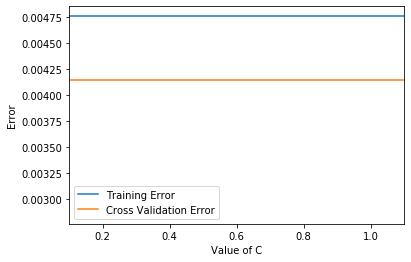

In [47]:
train_error, test_error = [],[]
for c in np.arange(0.1, 1, .1):
   
    classifier = svm.SVC( C= c, gamma='auto', kernel= 'linear')
    classifier.fit(X_train_tsne, y_train)
    y_pred = classifier.predict(X_test_tsne)    
    train_error.append(1-classifier.score(X_train_tsne, y_train))
    test_error.append(1-classifier.score(X_test_tsne, y_test))
    
plt.figure()
plt.clf()
plt.plot(train_error, label="Training Error")
plt.plot(test_error, label="Cross Validation Error")
plt.legend(loc="best")
plt.xlim(0.1, 1.1)
plt.xlabel("Value of C")
plt.ylabel("Error")

In [61]:
parameters = {
    'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 
    'C':[0.1],
    'gamma':('auto','scale')
}
svc = svm.SVC(random_state=0)
clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
clf.fit(X_train_tsne, y_train)
print(classification_report(y_test,clf.predict(X_test_tsne), digits=4))
print("Best hyperparameters:", clf.best_params_)
print("Training accuracy:",clf.score(X_train_tsne, y_train))
print("Test accuracy:",clf.score(X_test_tsne, y_test))

              precision    recall  f1-score   support

           0     0.9890    1.0000    0.9945        90
           1     1.0000    1.0000    1.0000        25
           2     1.0000    1.0000    1.0000        38
           3     1.0000    0.9787    0.9892        47
           4     1.0000    1.0000    1.0000        41

    accuracy                         0.9959       241
   macro avg     0.9978    0.9957    0.9967       241
weighted avg     0.9959    0.9959    0.9958       241

Best hyperparameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Training accuracy: 0.9952380952380953
Test accuracy: 0.995850622406639


#### 7.1.3 Decision Tree

Text(0, 0.5, 'Error')

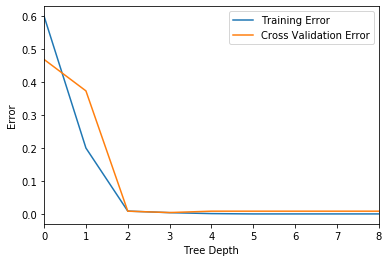

In [62]:
train_error, test_error = [],[]
for depth_limit in range(1, 21):
   
    classifier = DecisionTreeClassifier(max_depth= depth_limit, random_state=5)
    classifier.fit(X_train_tsne, y_train)
    y_pred = classifier.predict(X_test_tsne)    
    train_error.append(1-classifier.score(X_train_tsne, y_train))
    test_error.append(1-classifier.score(X_test_tsne, y_test))
plt.figure()
plt.clf()
plt.plot(train_error, label="Training Error")
plt.plot(test_error, label="Cross Validation Error")
plt.legend(loc="best")
plt.xlim(0,8)
plt.xlabel("Tree Depth")
plt.ylabel("Error")

Text(0, 0.5, 'Error')

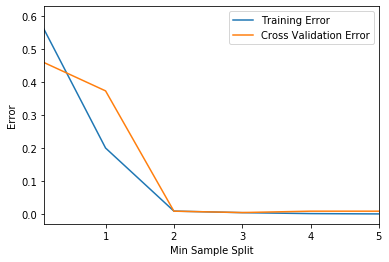

In [63]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
for min_sample in min_samples_splits:
   
    classifier = DecisionTreeClassifier(max_depth= 3, random_state=5, min_samples_split=min_sample)
    classifier.fit(X_train_tsne, y_train)
    y_pred = classifier.predict(X_test_tsne)    
    train_error.append(1-classifier.score(X_train_tsne, y_train))
    test_error.append(1-classifier.score(X_test_tsne, y_test))
plt.figure()
plt.clf()
plt.plot(train_error, label="Training Error")
plt.plot(test_error, label="Cross Validation Error")
plt.legend(loc="best")
plt.xlim(0.1,5)
plt.xlabel("Min Sample Split")
plt.ylabel("Error")

In [64]:
parameters ={'criterion':['gini','entropy'], 'max_features' : ['auto', 'sqrt', 'log2']}
dt = DecisionTreeClassifier(random_state=1, max_depth=3, min_samples_split=3)
clf = GridSearchCV(dt, parameters, cv=10)
clf.fit(X_train_tsne, y_train)
print(classification_report(y_test,clf.predict(X_test_tsne), digits=4))
print("Training accuracy:",clf.score(X_train_tsne, y_train))
print("Test accuracy:",clf.score(X_test_tsne, y_test))

              precision    recall  f1-score   support

           0     0.9783    1.0000    0.9890        90
           1     1.0000    1.0000    1.0000        25
           2     1.0000    1.0000    1.0000        38
           3     1.0000    0.9574    0.9783        47
           4     1.0000    1.0000    1.0000        41

    accuracy                         0.9917       241
   macro avg     0.9957    0.9915    0.9935       241
weighted avg     0.9919    0.9917    0.9917       241

Training accuracy: 0.9914285714285714
Test accuracy: 0.991701244813278
